In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas as pd

In [2]:
def plot_four_metric_plots(python_stats: pd.DataFrame,
                           n_craters_column: str,
                           areal_density_column: str,
                           z_column: str,
                           za_column: str,
                           output_filename: str,
                           saturation_line: int=None):
    font_size = 16
    
    fig, axes = plt.subplot_mosaic([['(a)', '(b)'], ['(c)', '(d)']],
                               figsize=(14, 7),
                               constrained_layout=True)

    for label, ax in axes.items():
        # label physical distance in and down:
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax.text(0.0,
                1.0,
                label,
                transform=ax.transAxes + trans,
                fontsize=16,
                verticalalignment='top',
                fontfamily='serif',
                bbox=dict(facecolor='1.0', edgecolor='none', pad=3.0))

    # Plot crater count
    ax = axes['(a)']
    ax.plot(python_stats.n_craters_added_in_study_region, python_stats[n_craters_column], color='b', label='Python')
    if saturation_line:
        ax.axvline(saturation_line, color="r", linestyle="--")
    ax.set_xlabel('$N_{tot}$', fontsize=font_size)
    ax.set_ylabel('$N_{obs}$', fontsize=font_size)

    # Plot crater count
    ax = axes['(b)']
    ax.plot(python_stats.n_craters_added_in_study_region, python_stats[areal_density_column], color='b', label='Python')
    if saturation_line:
        ax.axvline(saturation_line, color="r", linestyle="--")
    ax.set_xlabel('$N_{tot}$', fontsize=font_size)
    ax.set_ylabel('$A_d$', fontsize=font_size)

    # Plot Z statistic
    ax = axes['(c)']
    ax.plot(python_stats.n_craters_added_in_study_region, python_stats[z_column], color='b', label='Python')
    if saturation_line:
        ax.axvline(saturation_line, color="r", linestyle="--")
    ax.set_xlabel('$N_{tot}$', fontsize=font_size)
    ax.set_ylabel('$Z$', fontsize=font_size)

    # Plot Za statistic
    ax = axes['(d)']
    ax.plot(python_stats.n_craters_added_in_study_region, python_stats[za_column], color='b', label='Python')
    if saturation_line:
        ax.axvline(saturation_line, color="r", linestyle="--")
    ax.set_xlabel('$N_{tot}$', fontsize=font_size)
    ax.set_ylabel('$Z_a$', fontsize=font_size)

    plt.savefig(output_filename)
    plt.show()

In [3]:
base_path = "/data/saturation/central_composite_design/ccd8"
ivs = ["slope", "effective_radius_multiplier", "r_stat_multiplier", "min_rim_percentage", "n_craters_in_study_region"]

In [4]:
stats_file = f"{base_path}/ccd_1.900_0.500_6.000_3.000/statistics_100000.parquet"
stats_df = pd.read_parquet(stats_file)
stats_df = stats_df[:5000].copy()

FileNotFoundError: [Errno 2] No such file or directory: '/data/saturation/central_composite_design/ccd8/ccd_1.900_0.500_6.000_3.000/statistics_100000.parquet'

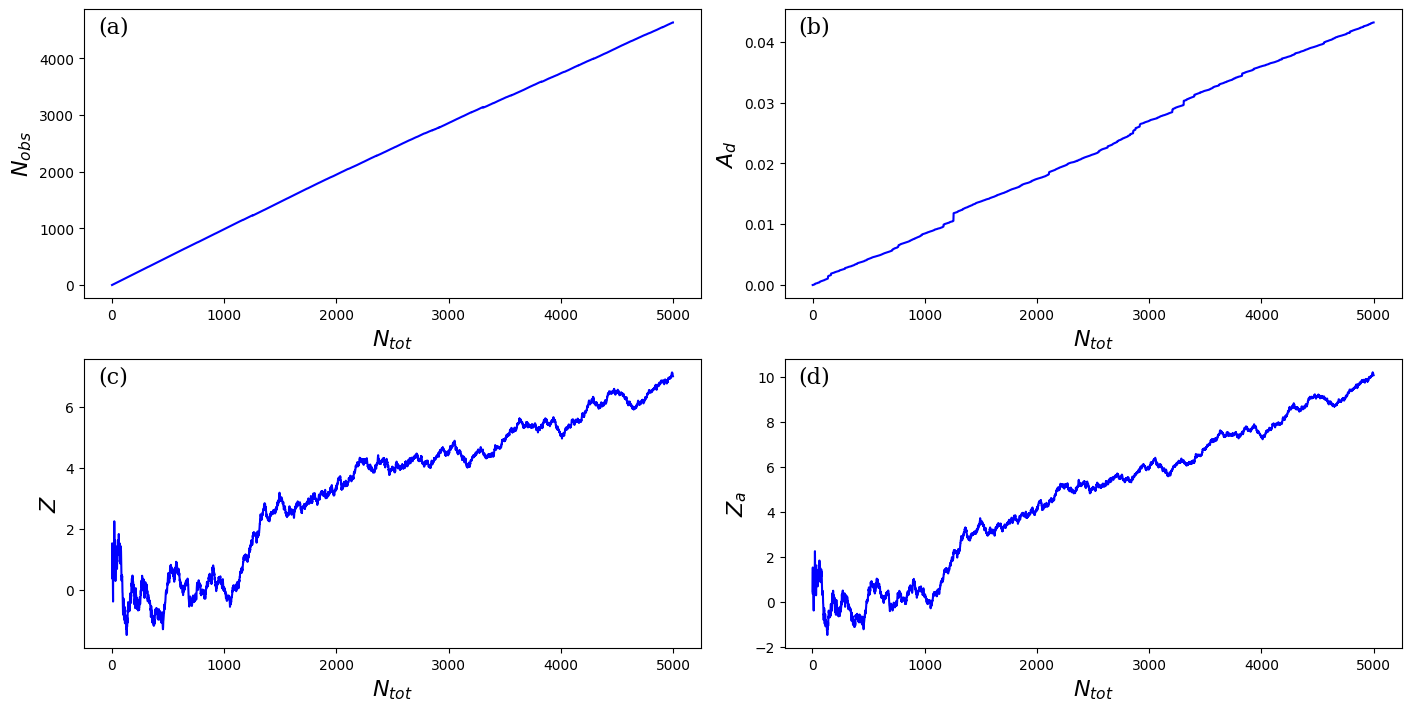

In [19]:
plot_four_metric_plots(stats_df,
                       "n_craters_in_study_region",
                       "areal_density",
                       "z",
                       "za",
                       "figures/saturation_not_reached.png")

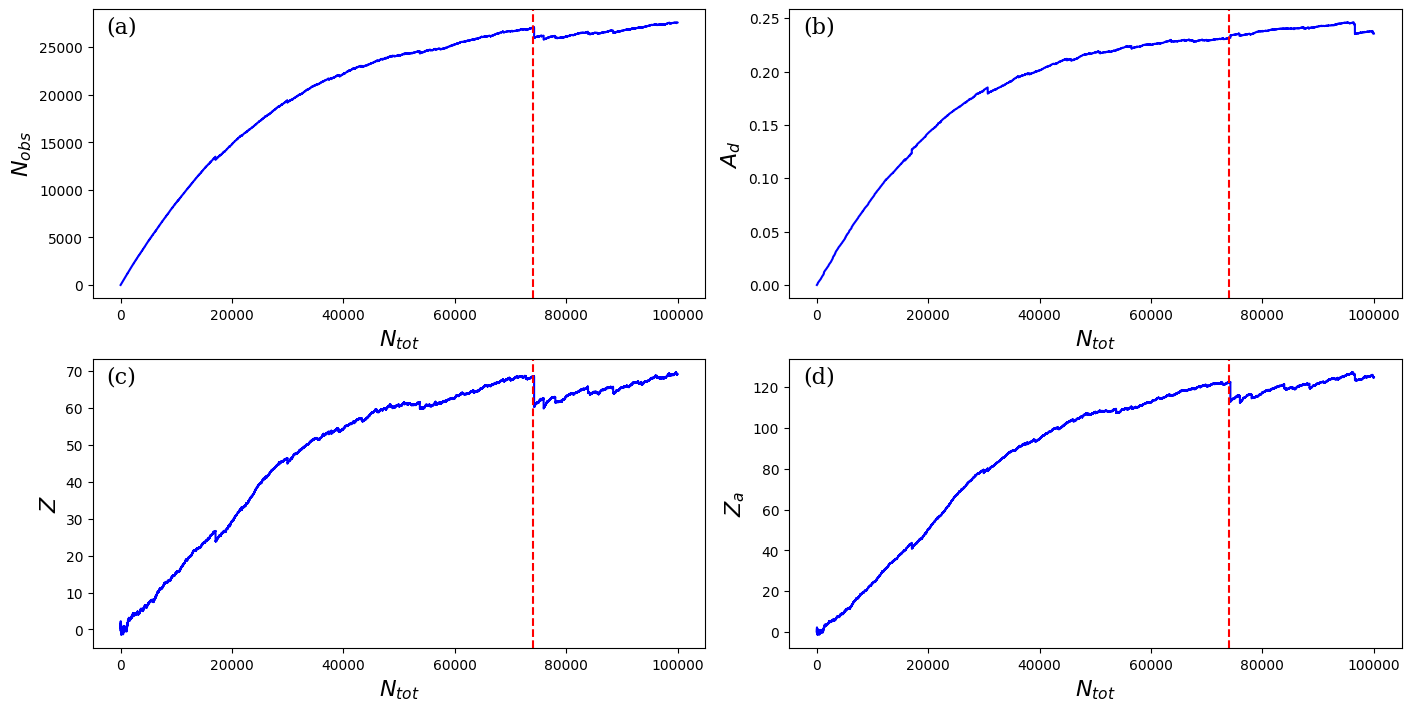

In [20]:
stats_file = f"{base_path}/ccd_1.900_0.500_6.000_3.000/statistics_100000.parquet"
stats_df = pd.read_parquet(stats_file)

stats_file = f"{base_path}/ccd_1.900_0.500_6.000_3.000/statistics_200000.parquet"
stats_df = pd.concat([stats_df, pd.read_parquet(stats_file)])

stats_file = f"{base_path}/ccd_1.900_0.500_6.000_3.000/statistics_250000.parquet"
stats_df = pd.concat([stats_df, pd.read_parquet(stats_file)])

stats_df = stats_df[:100000].copy()

plot_four_metric_plots(stats_df,
                       "n_craters_in_study_region",
                       "areal_density",
                       "z",
                       "za",
                       "figures/saturation_reached.png",
                       saturation_line=74000)